In [1]:
#exercise 3
import math 
import matplotlib.pyplot as plt
import numpy as np 

term_structure = {1:6, 
                  2:5.8, 
                  3:5.620, 
                  4: 5.460, 
                  5:5.330,  
                  6: 5.250, 
                  7:5.200, 
                  8:5.160, 
                  9:5.125,
                  10: 5.1 }

cash_flow = {1:6, 
             2:8,
             3:106, 
             4: 7 ,
             5 : 0 ,
             6:102,
             7:3,
             8: 3,
             9: 3,
             10: 110 }



class CashFlow:
    
    def __init__(self, term_structure, cashflow):
        self.term_structure = term_structure
        self.cashflow = cashflow
        
    def price(self):
        cash_flow = self.cashflow
        t = self.term_structure
        price_bond = 0 
        for j in range(1, len(cash_flow)+1):
            disc = math.exp(j * -t[j]/100) 
            price_bond += disc * cash_flow[j]
        return price_bond

    def duration(self):
        duration = 0
        price = self.price()
        cash_flow = self.cashflow
        t = self.term_structure
        for j in range(1, len(cash_flow)+1):
            disc = math.exp(j* -t[j]/100) 
            duration += disc * cash_flow[j] * j
        duration = duration/price
        return duration 

    def convexity(self):
        price = self.price()
        cash_flow = self.cashflow
        t = self.term_structure
        convexity = 0
        for j in range(1, len(cash_flow)+1):
            disc = math.exp(j * -t[j]/100) 
            convexity += disc * cash_flow[j] * j**2
        convexity = convexity/price
        return convexity 

    
    
def cash_flow_b(maturity, N, cr):
    cr_list = [cr*N for j in range(1,maturity)]
    cr_list.append(cr*N + N)
    keys = list(range(1,maturity+1))
    return dict(zip(keys, cr_list))
    

    
N = 100
maturity_b1 = 7
cr_b1 = 0.04
maturity_b2 = 8
cr_b2  = 0.1
   

cash_flow_b1, cash_flow_b2 = cash_flow_b(maturity_b1, N, cr_b1), cash_flow_b(maturity_b2, N, cr_b2)
    
Portfolio = CashFlow(term_structure, cash_flow)
Bond1 = CashFlow(term_structure, cash_flow_b1)
Bond2 = CashFlow(term_structure, cash_flow_b2)

price_port = Portfolio.price()
price_b1 = Bond1.price()
price_b2 = Bond2.price()
print(f"Prices\nPort: {price_port}, B1: {price_b1}, B2: {price_b2}")

duration_port =  Portfolio.duration()
duration_b1 =  Bond1.duration()
duration_b2 =  Bond2.duration()
print(f"Durations\nPort: {duration_port}, B1: {duration_b1}, B2: {duration_b2}")

convexity_port = Portfolio.convexity()
convexity_b1 = Bond1.convexity()
convexity_b2 = Bond2.convexity()
print(f"Convexity:\nPort: {convexity_port}, B1: {convexity_b1}, B2: {convexity_b2}")
print("")


Prices
Port: 254.40929549376068, B1: 92.17562531408444, B2: 129.51367373652306
Durations
Port: 5.76135022906746, B1: 6.212127379516997, B2: 6.160249135265953
Convexity:
Port: 41.656558221737576, B1: 41.47227974871966, B2: 44.037437764061245



In [28]:
# convexity hedging
m = np.array([[ -duration_b1*price_b1, -duration_b2*price_b2 ], 
              [convexity_b1 *price_b1,  convexity_b2*price_b2]])
y = np.array([[duration_port*price_port], [-convexity_port*price_port]])

q = np.linalg.inv(m) @ y
print(f"Shares B1: {q[0].item()}")
print(f"Shares B2: {q[1].item()}")

Shares B1: 0.4424959272685598
Shares B2: -2.1547236860862107


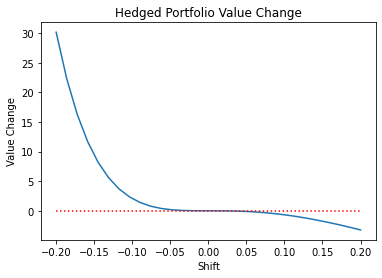

In [30]:
#shift yield curve 

def shift(t,s):
    newval = [j + s  for j in t.values()]
    keys = list(t.keys())
    return dict(zip(keys, newval))
    

def value_hedged(cash_flow, cash_flow_b1, cash_flow_b2, term_structure, q):   
    price_port = CashFlow(term_structure, cash_flow).price()
    price_b1 = CashFlow(term_structure, cash_flow_b1).price()
    price_b2 = CashFlow(term_structure, cash_flow_b2).price()
    return price_port + q[0]*price_b1 + q[1]*price_b2


initial_value = value_hedged(cash_flow, cash_flow_b1, cash_flow_b2, term_structure, q)
#the term structure that we have is in percentage 
s = np.linspace(-0.2,0.2, 30)
terms = [shift(term_structure, j*100) for j in s]
values = [value_hedged(cash_flow, cash_flow_b1, cash_flow_b2, t, q) for t in terms]


plt.plot(s, np.array(values) - initial_value)
plt.plot(s, [0 for j in s], color ="red",  linestyle = "dotted")
plt.xlabel("Shift")
plt.ylabel("Value Change")
plt.title("Hedged Portfolio Value Change")
plt.show()

